In [36]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import DataStructs,AllChem, Draw


In [4]:

##数据加载 1万个smi分子，文件下载可参考：https://github.com/zilliztech/MolSearch/edit/master/script/test_1w.smi

mols2 = []
with open(r"1w.smi","r") as f:
    ss = f.readlines()
    # print(ss)
    for i in ss:
        mols2.append(i.strip().split()[0])

In [5]:
## 生成指纹
X = []
for sim in mols2:
    
    mol = Chem.MolFromSmiles(sim)
    arr = np.zeros((0,))
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    DataStructs.ConvertToNumpyArray(fp, arr)
    X.append(arr)
print('{} mols loaded'.format(len(X)))


10000 mols loaded


In [25]:
## umap进行降维，默认是聚成2维，umap.UMAP里可以修改n_components

import umap

def tanimoto_dist(a,b):
    dotprod = np.dot(a,b)
    tc = dotprod / (np.sum(a) + np.sum(b) - dotprod)
    return 1.0-tc

# umap_X = umap.UMAP( metric=tanimoto_dist).fit_transform(X)
umap_X = umap.UMAP(n_components=5).fit(X)


In [20]:
umap_X.embedding_

array([[ 8.385548 ,  6.8194723,  3.9298182,  3.7317755,  4.3895497],
       [ 6.779685 , 11.696509 ,  6.647051 ,  6.0092187,  6.457715 ],
       [12.270625 ,  5.042044 , 10.7171755,  7.2644157,  5.707633 ],
       ...,
       [ 6.9460773,  4.852982 ,  6.025032 ,  4.616469 ,  5.8159003],
       [ 6.8240304,  4.8250546,  6.1405153,  4.6410346,  5.757452 ],
       [ 6.7627826,  4.7669835,  6.103966 ,  4.5831695,  5.7385297]],
      dtype=float32)

In [33]:
## 第三部 对umap降维处理的数据再次用hdbscan进行降维
import hdbscan
from collections import Counter

cluster_umap = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
cluster_umap.fit(umap_X.transform(X))


cluster_umap.labels_      ##（hdbscan降维后的聚类数）
Counter(cluster_umap.labels_).keys(),Counter(cluster_umap.labels_)  ## 查看各聚类中心的数据量 


(dict_keys([248, 212, 227, 269, 439, 46, 262, 327, 268, -1, 43, 198, 61, 45, 107, 200, 374, 104, 25, 399, 64, 10, 238, 29, 280, 115, 50, 59, 256, 277, 223, 260, 65, 405, 77, 153, 93, 94, 281, 357, 430, 201, 76, 30, 55, 52, 18, 27, 197, 99, 15, 106, 418, 125, 332, 144, 101, 190, 373, 113, 7, 56, 326, 96, 194, 2, 32, 57, 209, 264, 205, 236, 174, 162, 282, 69, 261, 122, 383, 344, 178, 105, 154, 175, 74, 391, 196, 380, 228, 78, 403, 237, 19, 114, 441, 148, 279, 204, 139, 182, 409, 407, 116, 417, 171, 158, 244, 427, 404, 308, 420, 249, 297, 339, 193, 337, 26, 206, 3, 184, 67, 303, 293, 360, 6, 89, 222, 245, 111, 160, 340, 285, 437, 274, 273, 440, 163, 428, 414, 415, 377, 40, 385, 433, 410, 157, 324, 366, 389, 349, 323, 356, 146, 91, 147, 14, 334, 369, 395, 379, 165, 359, 384, 330, 333, 393, 372, 397, 400, 325, 408, 338, 434, 429, 394, 13, 239, 423, 39, 241, 22, 85, 44, 86, 38, 128, 129, 119, 54, 4, 5, 265, 406, 381, 354, 331, 347, 317, 387, 401, 388, 425, 386, 361, 411, 329, 378, 362, 424, 

In [35]:
len(set(cluster_umap.labels_))

443

In [16]:
import umap.plot

In [39]:
len(cluster_umap_dict["0"])

38

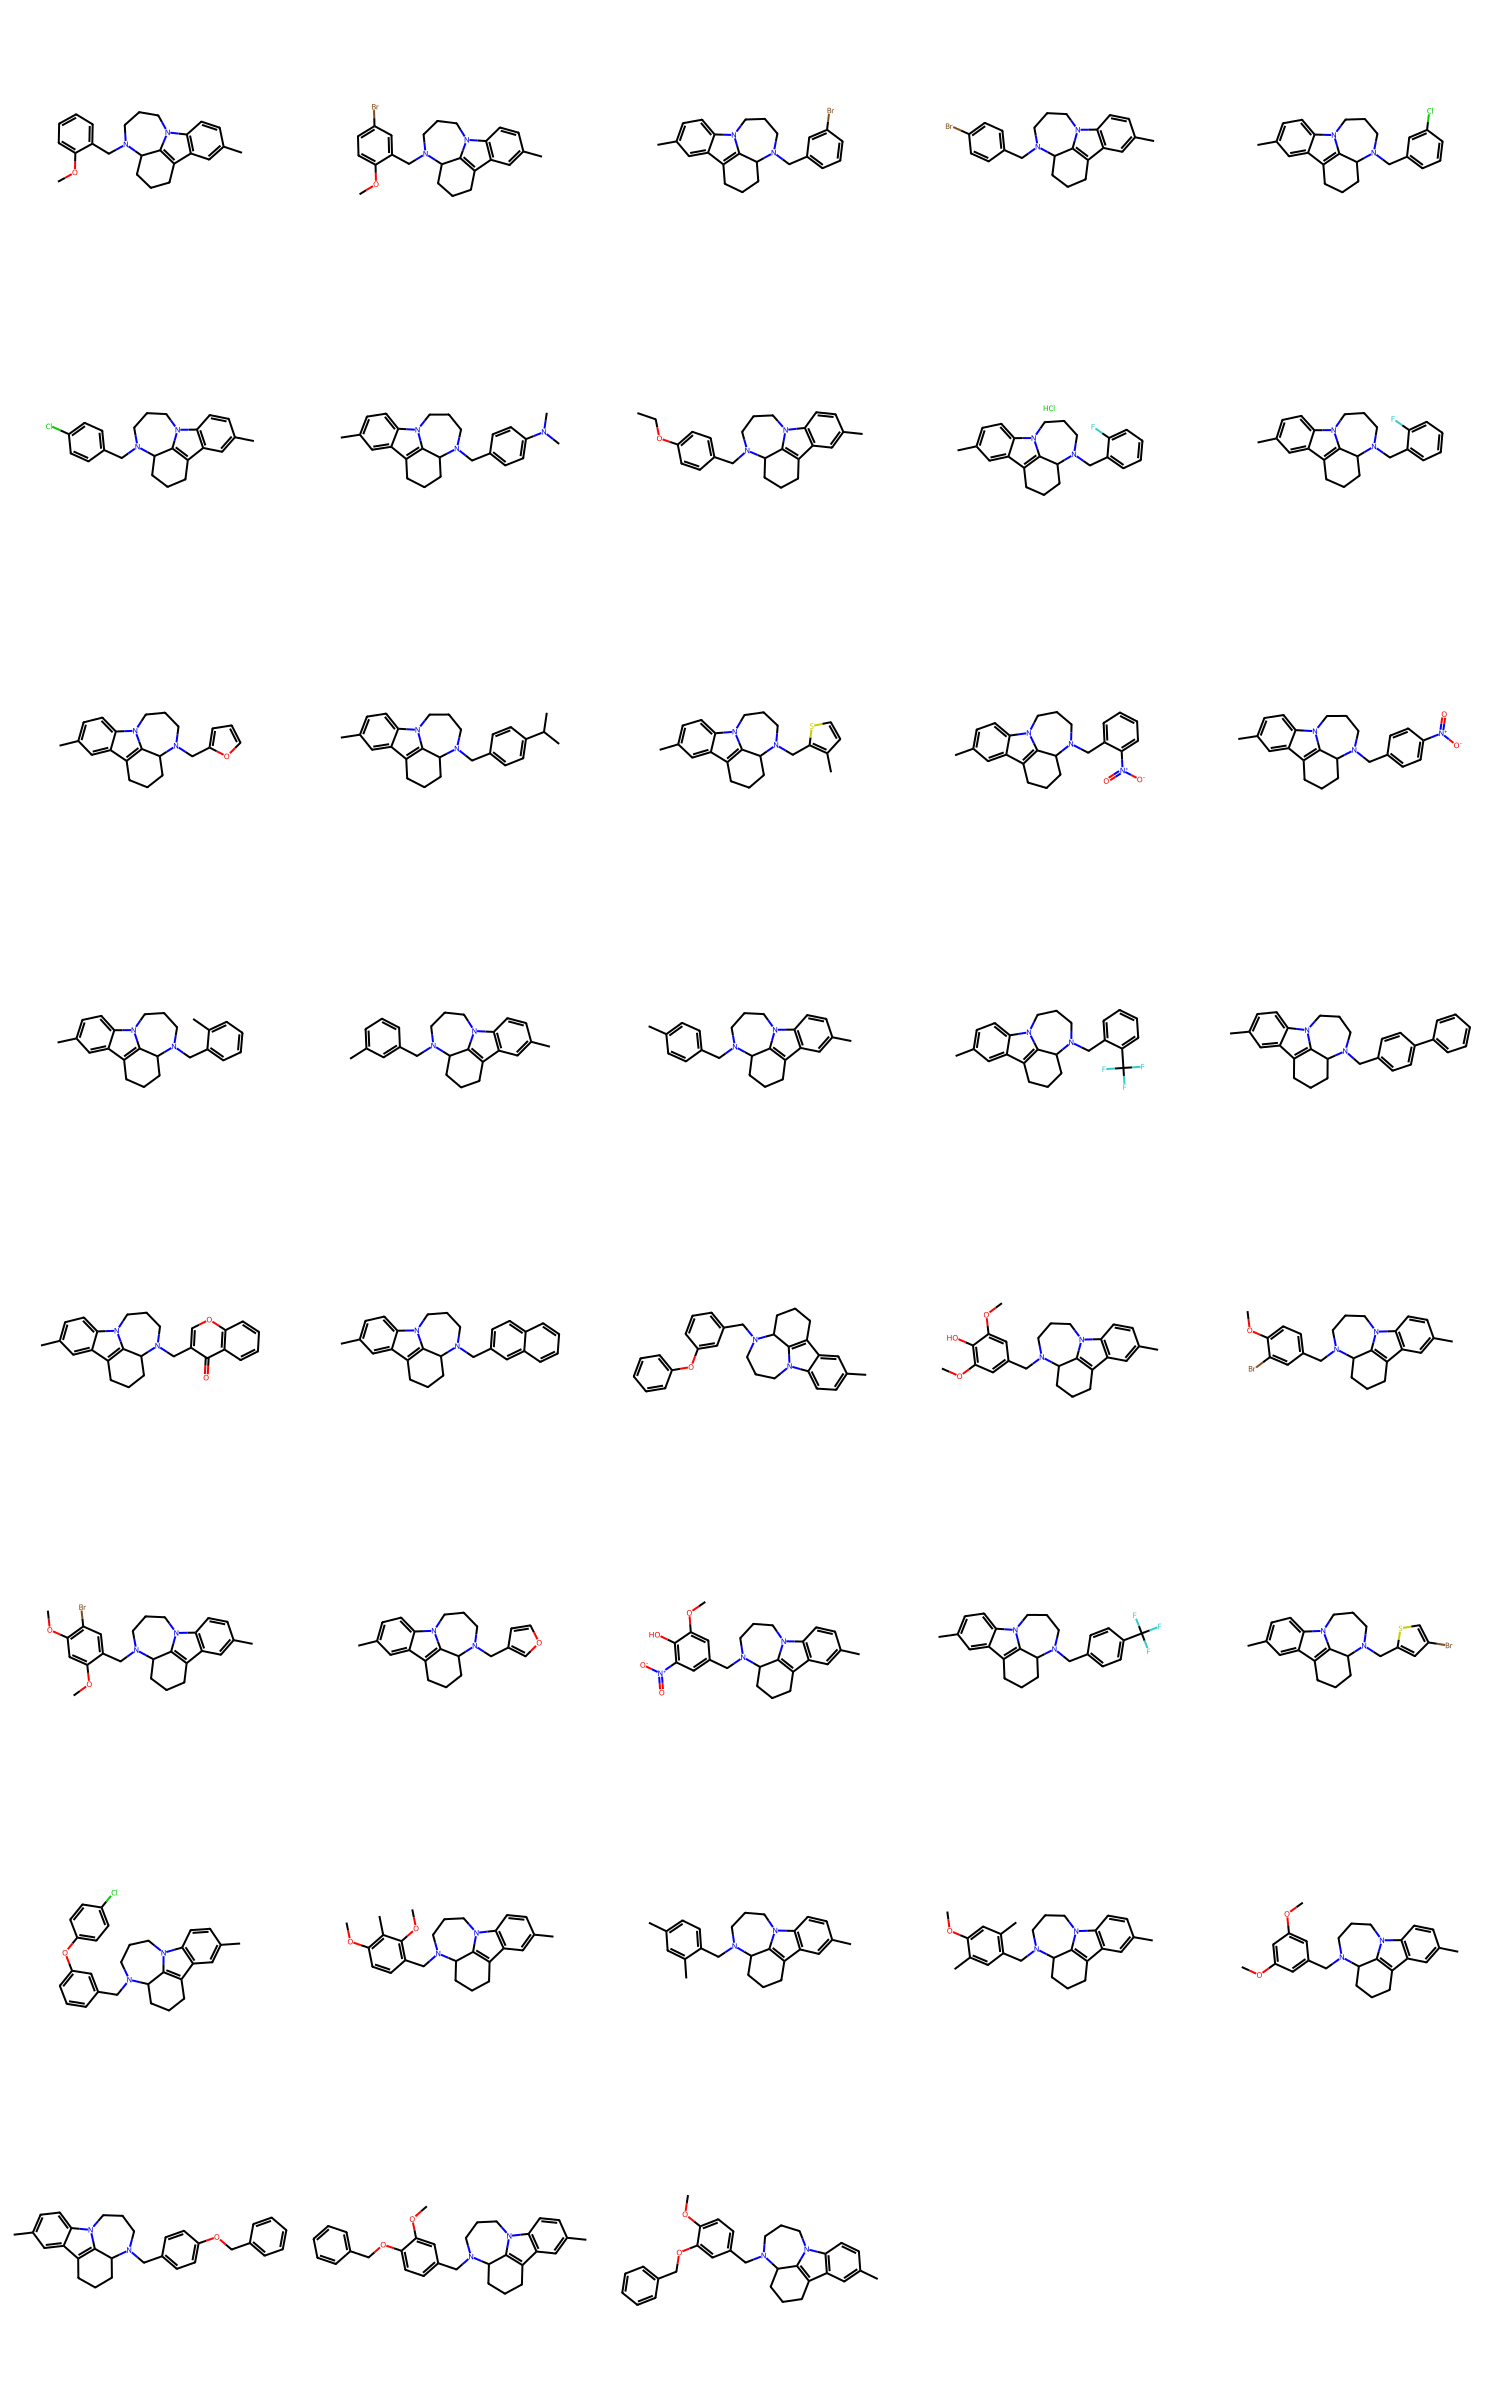

In [51]:
cluster_umap_dict ={}
for index, value in enumerate(cluster_umap.labels_.tolist()):
        # print("索引：" ,index, ", 值：" ,value)
        value =str(value)
        if value not in cluster_umap_dict:
                cluster_umap_dict[value] = [index]
        else:
                cluster_umap_dict[value].append(index)

new_mols2 = []
sa_scores2 = []

for ii in cluster_umap_dict["0"]:  ##这是聚类0中心的数据展示
    sim = mols2[ii]   ##results["hits"]["hits"]  这是总共分子的原始数据
    
    mol = Chem.MolFromSmiles(sim)
    new_mols2.append(mol)



Draw.MolsToGridImage(new_mols2,subImgSize=(300,300), molsPerRow=5)


数量: 47


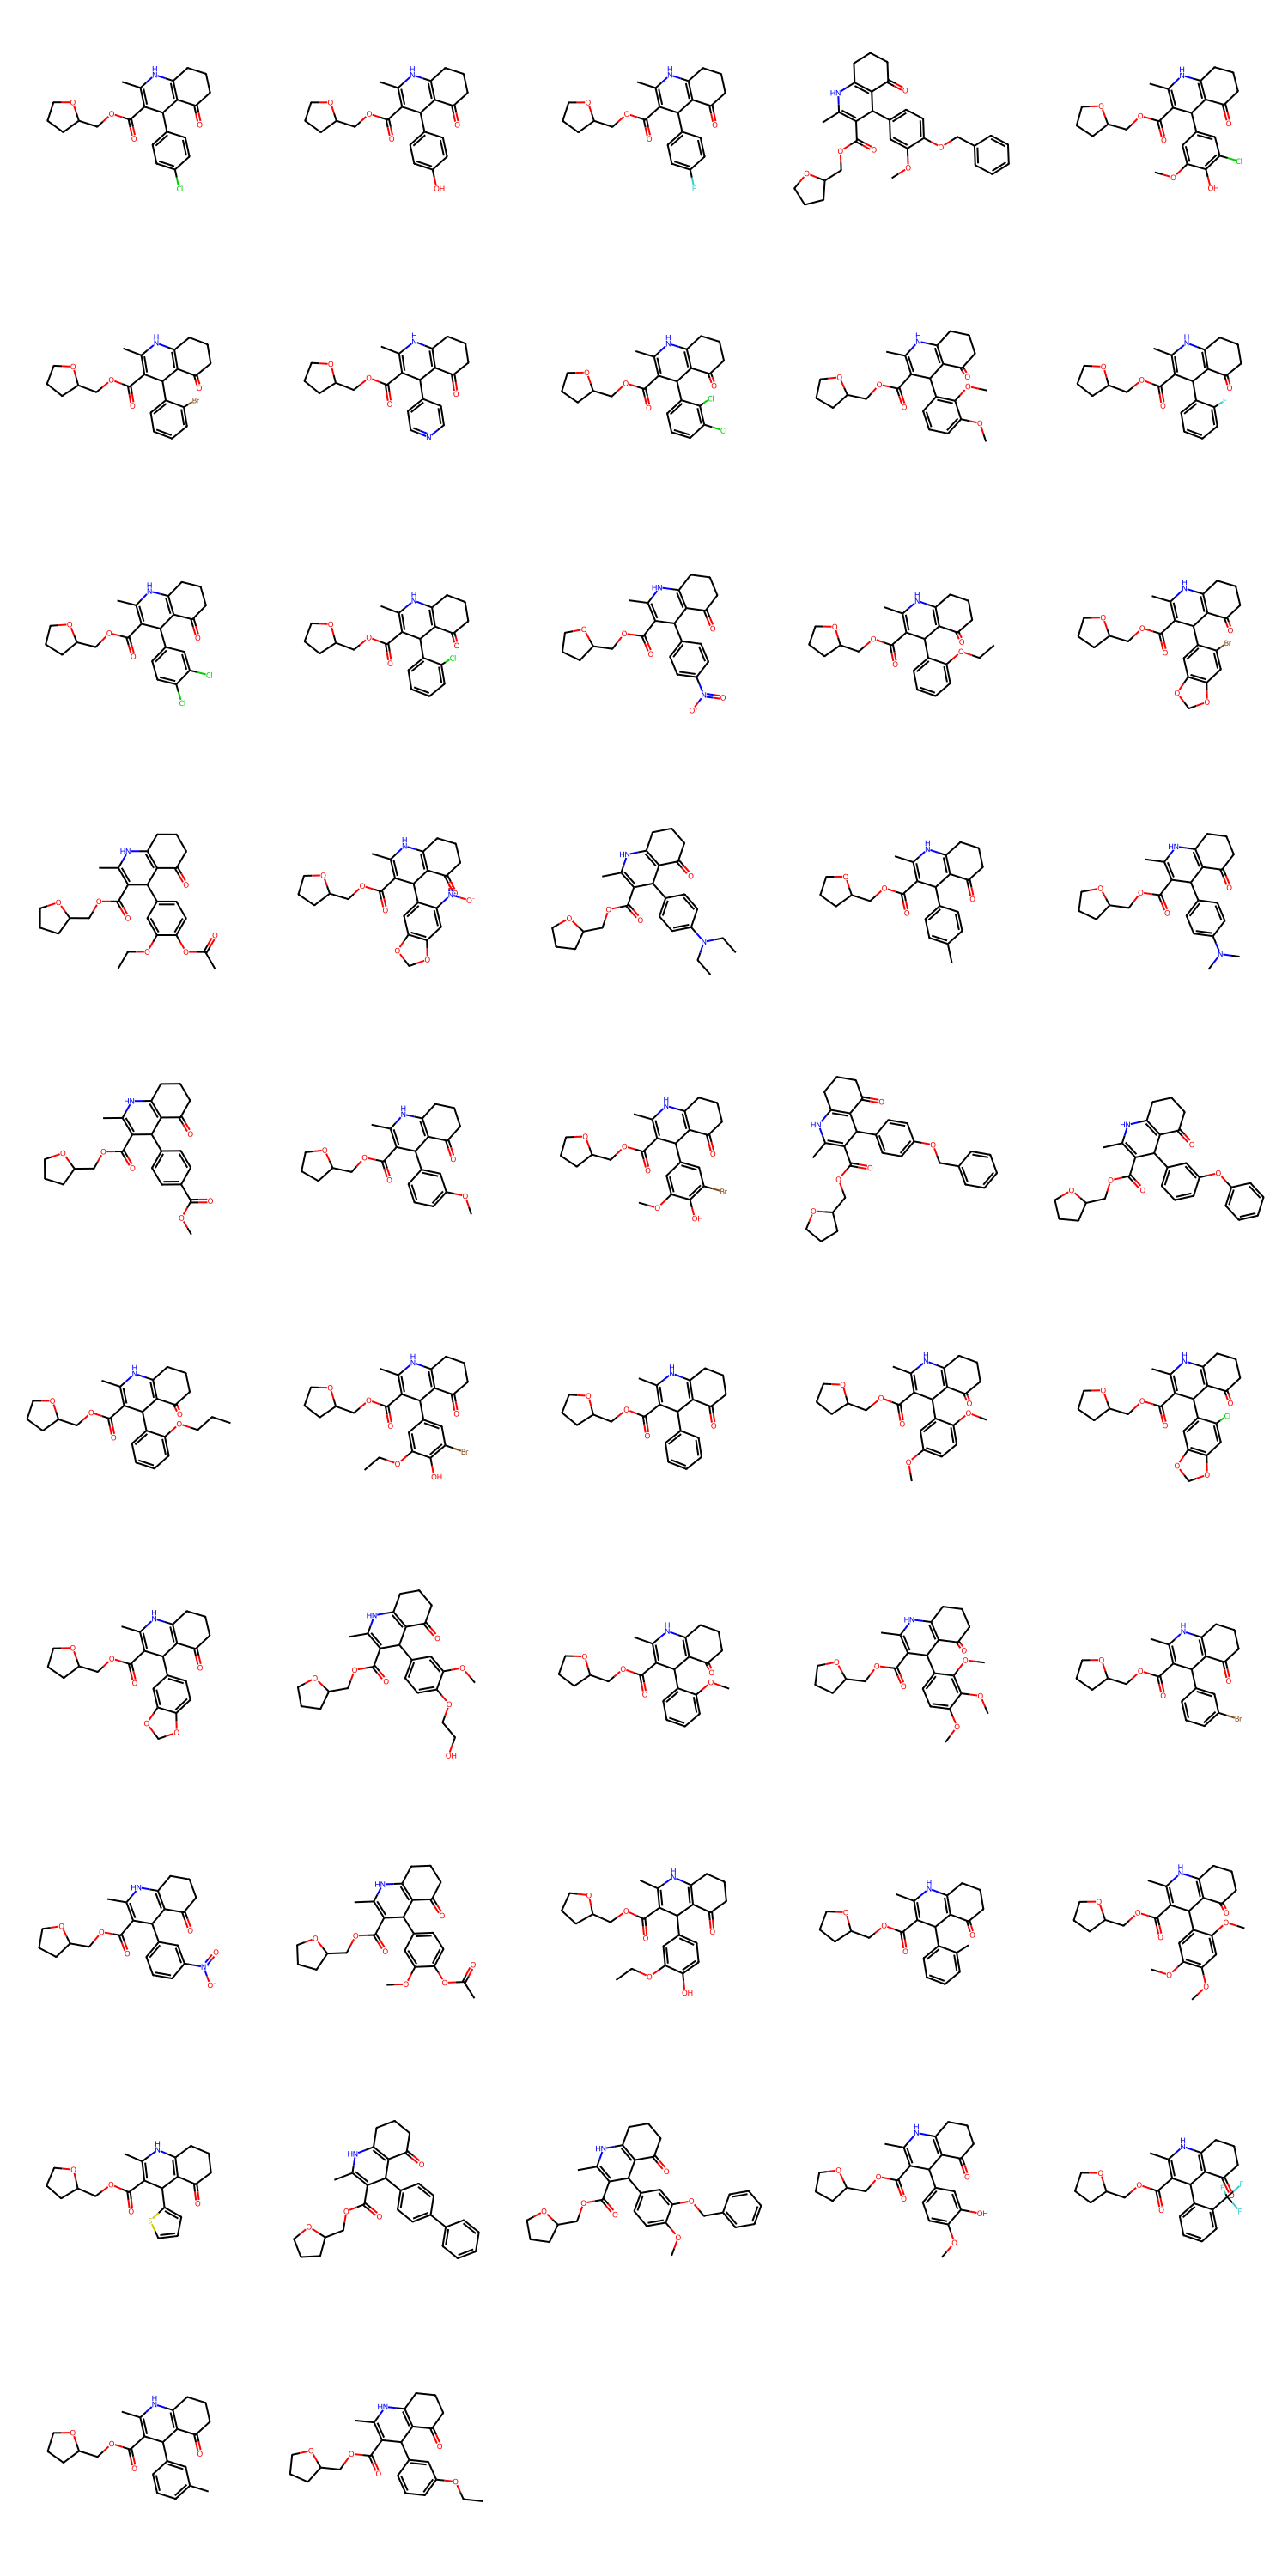

In [40]:
new_mols2 = []
sa_scores2 = []

print("数量:",len(cluster_umap_dict["20"]))
for ii in cluster_umap_dict["20"]:  ##这是聚类20中心的数据展示
    sim = mols2[ii]   ##results["hits"]["hits"]  这是总共分子的原始数据
    
    mol = Chem.MolFromSmiles(sim)
    new_mols2.append(mol)



Draw.MolsToGridImage(new_mols2,subImgSize=(300,300), molsPerRow=5)

数量: 13


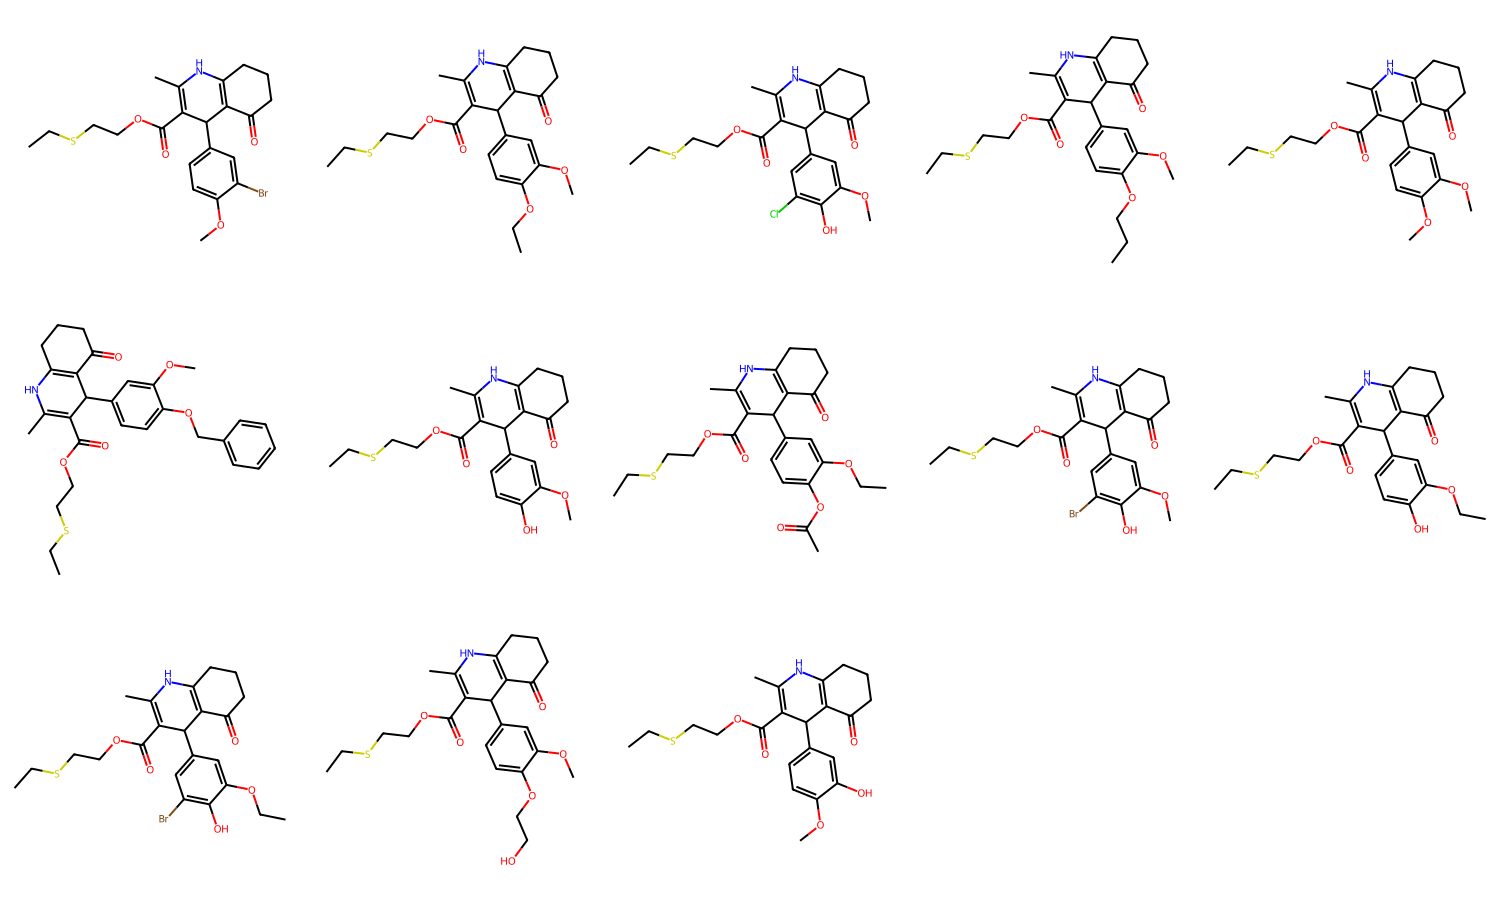

In [41]:
new_mols2 = []
sa_scores2 = []

print("数量:",len(cluster_umap_dict["120"]))
for ii in cluster_umap_dict["120"]:  ##这是聚类120中心的数据展示
    sim = mols2[ii]   ##results["hits"]["hits"]  这是总共分子的原始数据
    
    mol = Chem.MolFromSmiles(sim)
    new_mols2.append(mol)



Draw.MolsToGridImage(new_mols2,subImgSize=(300,300), molsPerRow=5)

In [42]:
## KMeans测试

from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=10)
kmeans.fit(umap_X.transform(X))

KMeans(n_clusters=10)

In [45]:
kmeans.labels_

array([4, 3, 9, ..., 7, 7, 7])

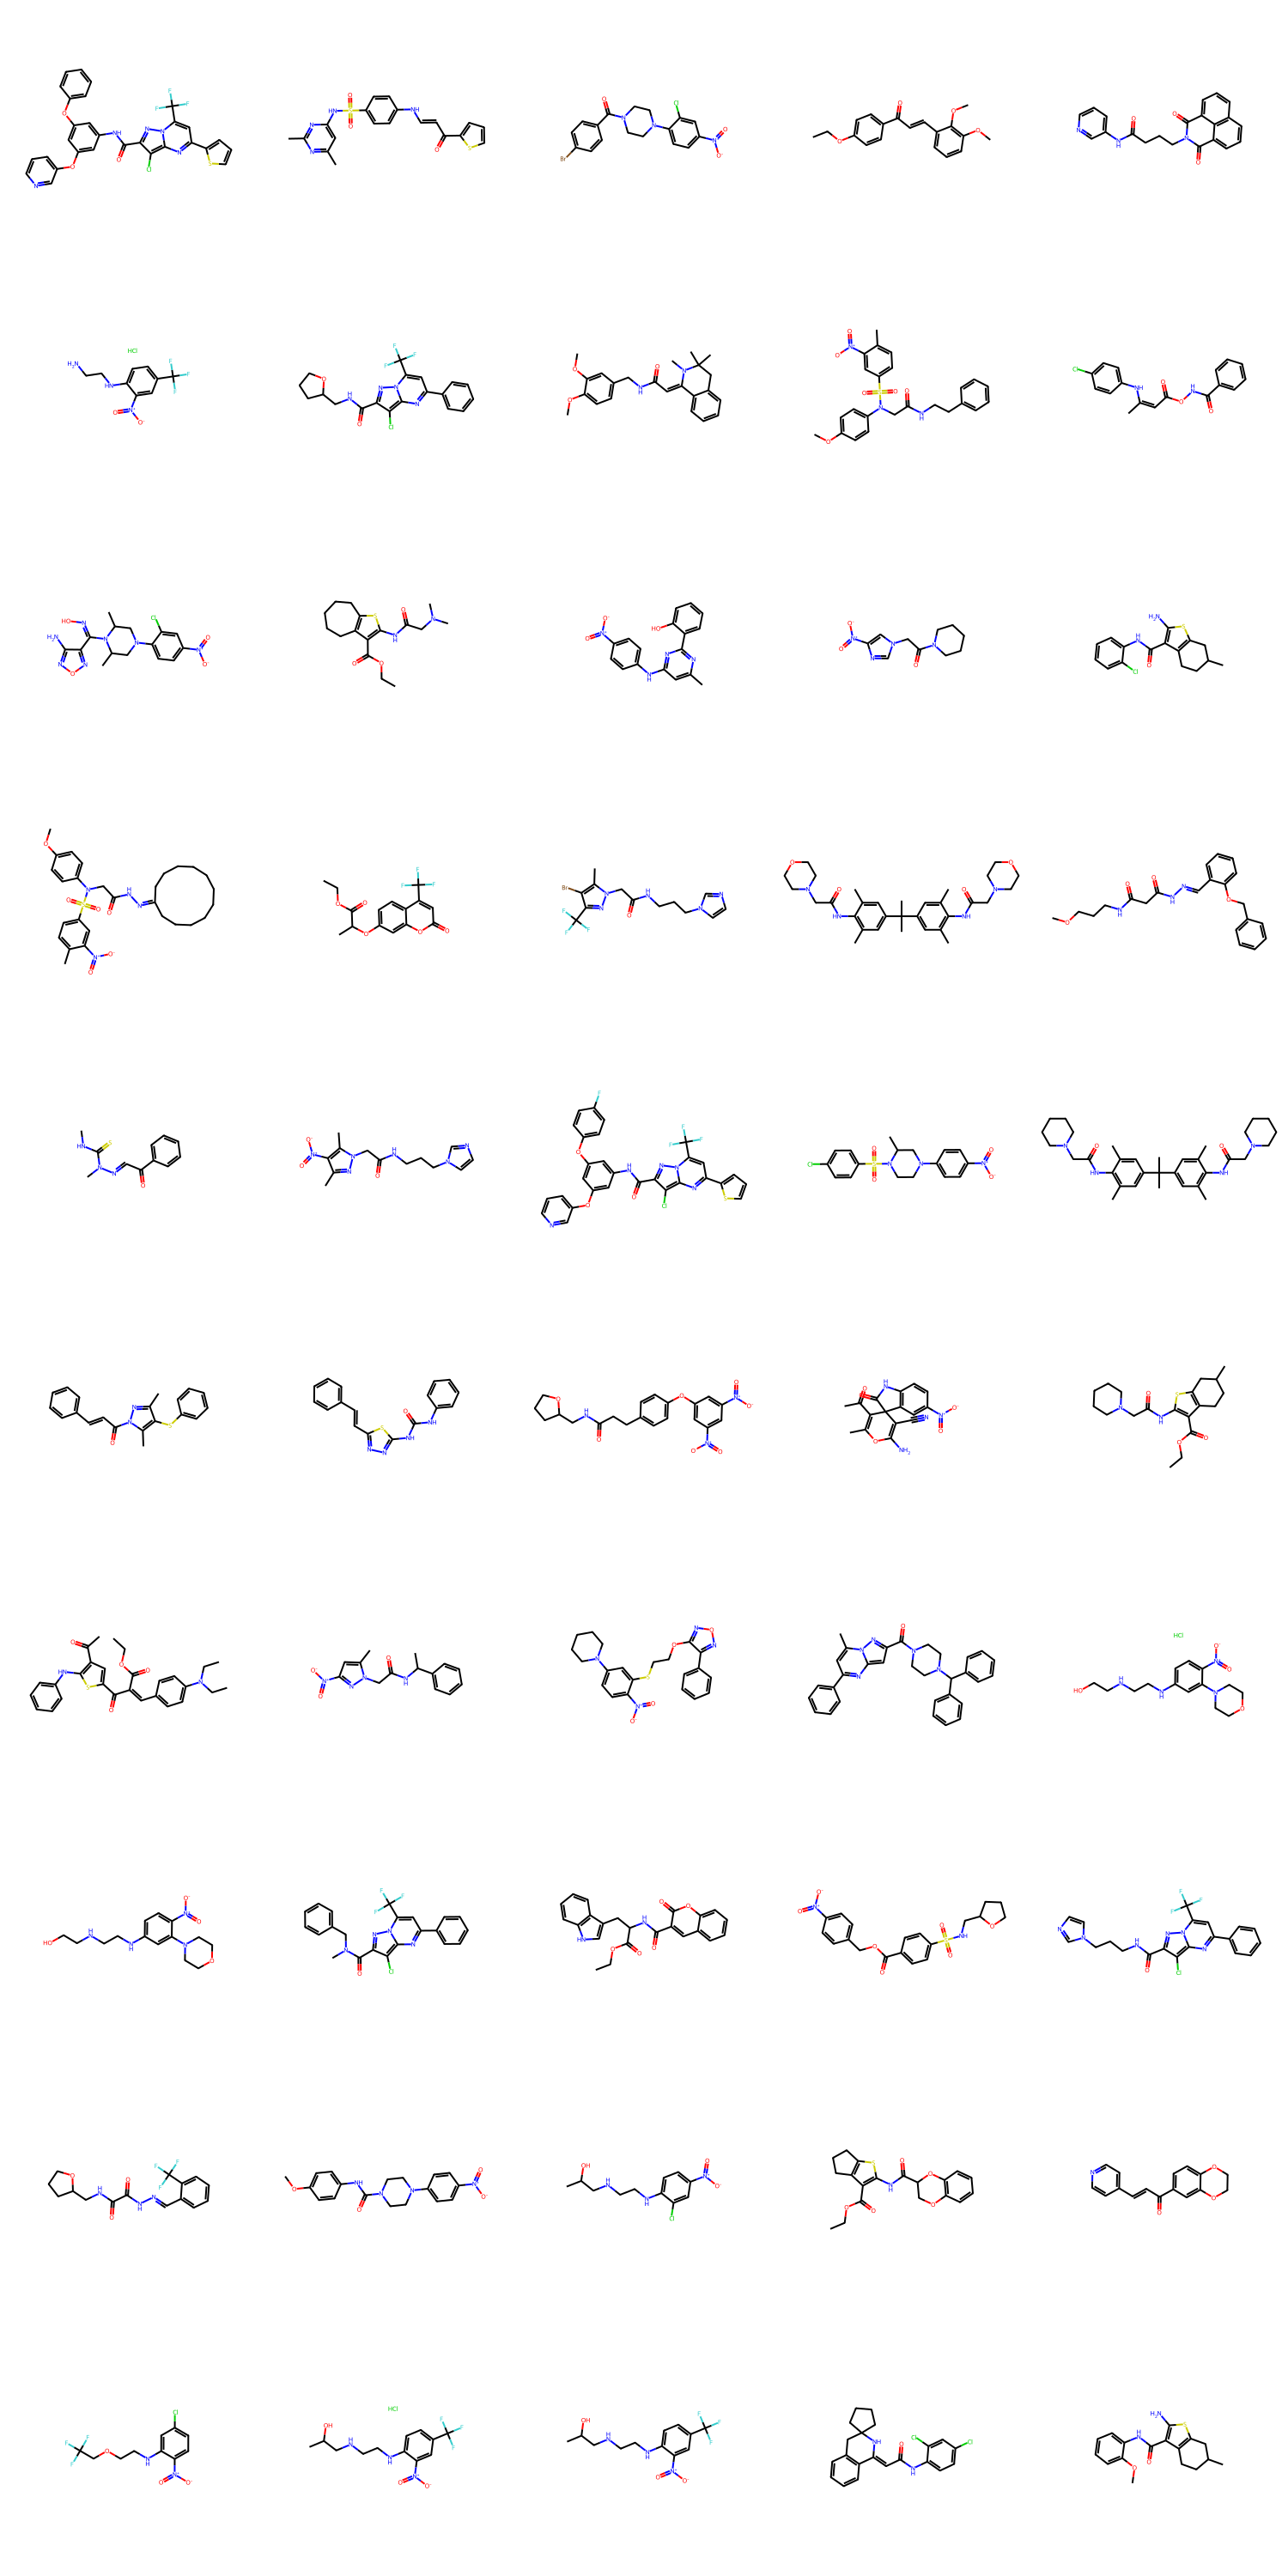

In [50]:
kmeans_dict ={}
for index, value in enumerate(kmeans.labels_.tolist()):
        # print("索引：" ,index, ", 值：" ,value)
        value =str(value)
        if value not in kmeans_dict:
                kmeans_dict[value] = [index]
        else:
                kmeans_dict[value].append(index)

new_mols2 = []
sa_scores2 = []

for ii in kmeans_dict["0"]:  ##这是聚类0中心的数据展示
    sim = mols2[ii]   ##results["hits"]["hits"]  这是总共分子的原始数据
    
    mol = Chem.MolFromSmiles(sim)
    new_mols2.append(mol)



Draw.MolsToGridImage(new_mols2,subImgSize=(300,300), molsPerRow=5)


数量: 479


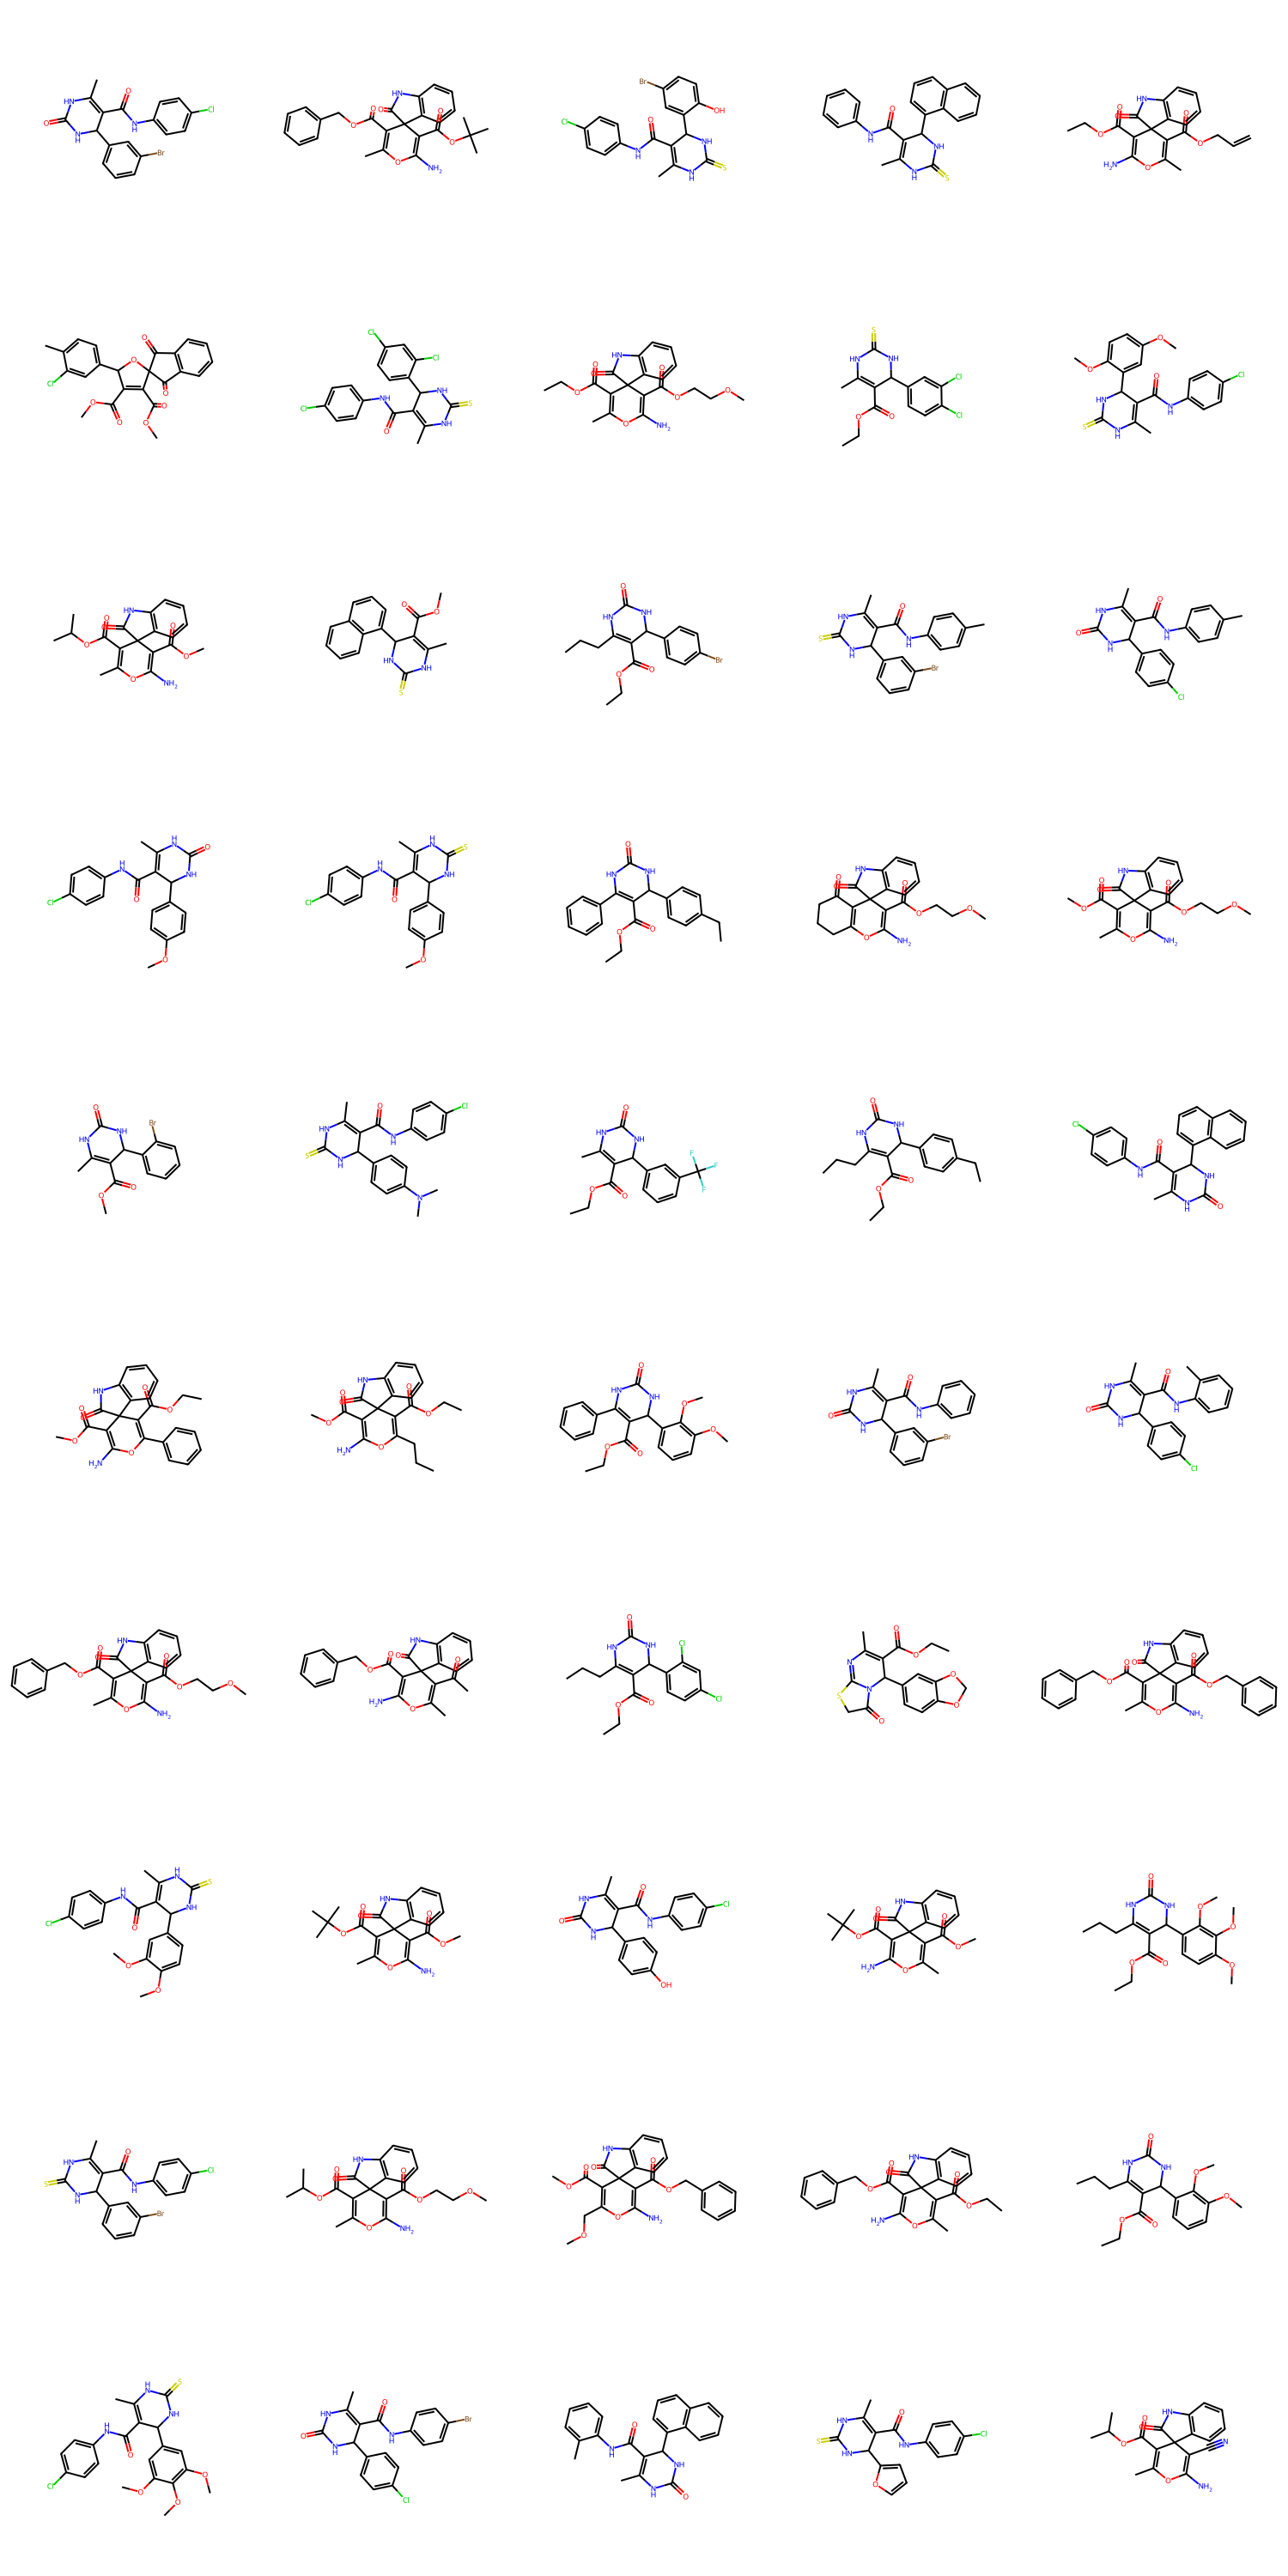

In [49]:
new_mols2 = []
sa_scores2 = []

print("数量:",len(kmeans_dict["9"]))
for ii in kmeans_dict["9"]:  ##这是聚类9中心的数据展示
    sim = mols2[ii]   ##results["hits"]["hits"]  这是总共分子的原始数据
    
    mol = Chem.MolFromSmiles(sim)
    new_mols2.append(mol)



Draw.MolsToGridImage(new_mols2,subImgSize=(300,300), molsPerRow=5)